In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dfcpi1=pd.read_csv("../data/original/CPIAUCSL.csv")  #CPI Index
dfcpi2=pd.read_csv("../data/original/CPILFESL.csv")  #CPI ex Food and Energy
dfpce1=pd.read_csv("../data/original/PCEPI.csv")     #PCE Index  
dfpce2=pd.read_csv("../data/original/PCEPILFE.csv")  #PCE ex Food and Energy

In [2]:
dfcpi1.set_index("DATE", inplace=True)
dfcpi2.set_index("DATE", inplace=True)
dfpce1.set_index("DATE", inplace=True)  
dfpce2.set_index("DATE", inplace=True)  

In [3]:
cpi1_final = dfcpi1['1959-01-01':]
cpi2_final = dfcpi2['1959-01-01':]
pce1_final = dfpce1['1959-01-01':]
pce2_final = dfpce2['1959-01-01':]

In [4]:
full_inflation = pd.concat([cpi1_final, cpi2_final,pce1_final, pce2_final], axis=1)
full_inflation = full_inflation.reset_index()

In [5]:
full_inflation


,DATE,CPIAUCSL,CPILFESL,PCEPI,PCEPILFE
0,1959-01-01,29.010,29.900,16.042,16.688
1,1959-02-01,29.000,29.900,16.057,16.701
2,1959-03-01,28.970,30.000,16.068,16.719
3,1959-04-01,28.980,30.000,16.100,16.762
4,1959-05-01,29.040,30.100,16.109,16.783
...,...,...,...,...,...
753,2021-10-01,276.590,281.705,117.429,118.915
754,2021-11-01,278.524,283.179,118.106,119.483
755,2021-12-01,280.126,284.770,118.709,120.092
756,2022-01-01,281.933,286.431,119.356,120.681


In [6]:
full_inflation.info



<bound method DataFrame.info of            DATE  CPIAUCSL  CPILFESL    PCEPI  PCEPILFE
0    1959-01-01    29.010    29.900   16.042    16.688
1    1959-02-01    29.000    29.900   16.057    16.701
2    1959-03-01    28.970    30.000   16.068    16.719
3    1959-04-01    28.980    30.000   16.100    16.762
4    1959-05-01    29.040    30.100   16.109    16.783
..          ...       ...       ...      ...       ...
753  2021-10-01   276.590   281.705  117.429   118.915
754  2021-11-01   278.524   283.179  118.106   119.483
755  2021-12-01   280.126   284.770  118.709   120.092
756  2022-01-01   281.933   286.431  119.356   120.681
757  2022-02-01   284.182   287.878  120.047   121.108

[758 rows x 5 columns]>

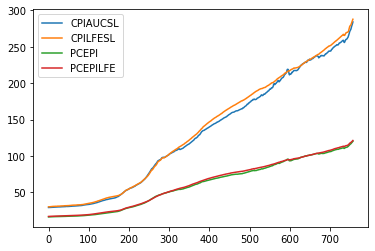

In [7]:
full_inflation.plot()
plt.show()

In [8]:
full_inflation['DATE'] = pd.to_datetime(full_inflation['DATE'])
full_inflation.set_index('DATE', inplace=True)
full_inflation.index = pd.to_datetime(full_inflation.index)
full_inflation = full_inflation.resample('A').last()
full_inflation.head()


,CPIAUCSL,CPILFESL,PCEPI,PCEPILFE
DATE,,,,
1959-12-31,29.41,30.5,16.323,17.029
1960-12-31,29.81,30.7,16.569,17.255
1961-12-31,30.01,31.2,16.658,17.458
1962-12-31,30.38,31.6,16.882,17.677
1963-12-31,30.88,32.1,17.127,17.972


In [9]:
full_inflation = full_inflation.reset_index()
full_inflation['DATE'] = full_inflation['DATE'].apply(lambda x: x.strftime('%Y'))
full_inflation.set_index('DATE', inplace=True)

In [10]:
full_inflation

,CPIAUCSL,CPILFESL,PCEPI,PCEPILFE
DATE,,,,
1959,29.410,30.500,16.323,17.029
1960,29.810,30.700,16.569,17.255
1961,30.010,31.200,16.658,17.458
1962,30.380,31.600,16.882,17.677
1963,30.880,32.100,17.127,17.972
...,...,...,...,...
2018,252.551,259.934,108.990,111.006
2019,258.263,265.742,110.789,112.824
2020,261.564,269.984,112.220,114.494


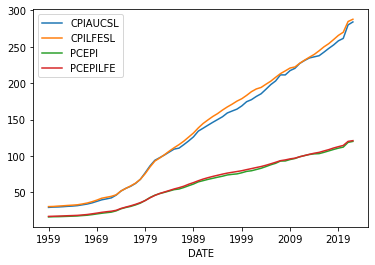

In [11]:
full_inflation.plot()
plt.show()


In [12]:
full_inflation

,CPIAUCSL,CPILFESL,PCEPI,PCEPILFE
DATE,,,,
1959,29.410,30.500,16.323,17.029
1960,29.810,30.700,16.569,17.255
1961,30.010,31.200,16.658,17.458
1962,30.380,31.600,16.882,17.677
1963,30.880,32.100,17.127,17.972
...,...,...,...,...
2018,252.551,259.934,108.990,111.006
2019,258.263,265.742,110.789,112.824
2020,261.564,269.984,112.220,114.494


In [13]:
full_inflation["CPIAUCSL Percent Change"] = full_inflation["CPIAUCSL"].pct_change()*100
full_inflation["CPILFESL Percent Change"] = full_inflation["CPILFESL"].pct_change()*100
full_inflation["PCEPI Percent Change"] = full_inflation["PCEPI"].pct_change()*100
full_inflation["PCEPILFE Percent Change"] = full_inflation["PCEPILFE"].pct_change()*100
#full_inflation = full_inflation.dropna(0)
full_inflation

,CPIAUCSL,CPILFESL,PCEPI,PCEPILFE,CPIAUCSL Percent Change,CPILFESL Percent Change,PCEPI Percent Change,PCEPILFE Percent Change
DATE,,,,,,,,
1959,29.410,30.500,16.323,17.029,NaN,NaN,NaN,NaN
1960,29.810,30.700,16.569,17.255,1.360082,0.655738,1.507076,1.327148
1961,30.010,31.200,16.658,17.458,0.670916,1.628664,0.537148,1.176471
1962,30.380,31.600,16.882,17.677,1.232922,1.282051,1.344699,1.254439
1963,30.880,32.100,17.127,17.972,1.645820,1.582278,1.451250,1.668835
...,...,...,...,...,...,...,...,...
2018,252.551,259.934,108.990,111.006,1.915216,2.197811,1.864573,2.056652
2019,258.263,265.742,110.789,112.824,2.261721,2.234413,1.650610,1.637749
2020,261.564,269.984,112.220,114.494,1.278154,1.596285,1.291644,1.480182


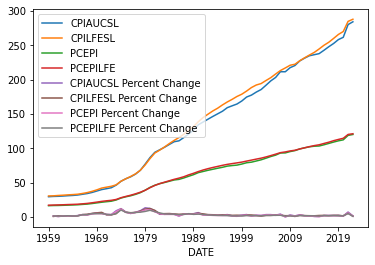

In [14]:
full_inflation.plot()
plt.show()

In [17]:
test = full_inflation.reset_index()

test


,DATE,CPIAUCSL,CPILFESL,PCEPI,PCEPILFE,CPIAUCSL Percent Change,CPILFESL Percent Change,PCEPI Percent Change,PCEPILFE Percent Change
0,1959,29.410,30.500,16.323,17.029,NaN,NaN,NaN,NaN
1,1960,29.810,30.700,16.569,17.255,1.360082,0.655738,1.507076,1.327148
2,1961,30.010,31.200,16.658,17.458,0.670916,1.628664,0.537148,1.176471
3,1962,30.380,31.600,16.882,17.677,1.232922,1.282051,1.344699,1.254439
4,1963,30.880,32.100,17.127,17.972,1.645820,1.582278,1.451250,1.668835
...,...,...,...,...,...,...,...,...,...
59,2018,252.551,259.934,108.990,111.006,1.915216,2.197811,1.864573,2.056652
60,2019,258.263,265.742,110.789,112.824,2.261721,2.234413,1.650610,1.637749
61,2020,261.564,269.984,112.220,114.494,1.278154,1.596285,1.291644,1.480182
62,2021,280.126,284.770,118.709,120.092,7.096542,5.476621,5.782392,4.889339


In [29]:
full_percent_change = test.drop(columns = ["CPIAUCSL","CPILFESL","PCEPI","PCEPILFE"])
full_percent_change = full_percent_change.dropna()
full_percent_change = full_percent_change.set_index("DATE")
full_percent_change

,CPIAUCSL Percent Change,CPILFESL Percent Change,PCEPI Percent Change,PCEPILFE Percent Change
DATE,,,,
1960,1.360082,0.655738,1.507076,1.327148
1961,0.670916,1.628664,0.537148,1.176471
1962,1.232922,1.282051,1.344699,1.254439
1963,1.645820,1.582278,1.451250,1.668835
1964,1.198187,1.246106,1.354586,1.274204
...,...,...,...,...
2018,1.915216,2.197811,1.864573,2.056652
2019,2.261721,2.234413,1.650610,1.637749
2020,1.278154,1.596285,1.291644,1.480182


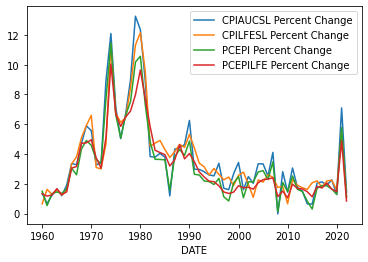

In [30]:
full_percent_change.plot()
plt.show()